In [ ]:
import os
import sys
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import yaml
import numpy as np

sns.set_theme(style="whitegrid")

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.append(project_root)

with open(os.path.join(project_root, "params.yaml"), "r") as f:
    params = yaml.safe_load(f)

model_version = params['serving']['model_version']
model_dir = os.path.join(project_root, "models", "ranking", "deepfm_" + model_version)
history_path = os.path.join(model_dir, "history.pkl")

print(f"Analyzing DNN model version: {model_version}")
print(f"Loading history from: {history_path}")

Analyzing DeepFM model version: v1
Loading history from: d:\Projects\Dissertation\RecSys\recsys-distribution-thesis\models\ranking\deepfm_v1\history.pkl


In [ ]:

if not os.path.exists(history_path):
    print("Error: file not found.")
else:
    with open(history_path, "rb") as f:
        history = pickle.load(f)
    print("History loaded successfully. Available metrics:", history.keys())

def plot_tf_metrics(history, metric_name, val_metric_name, title, higher_is_better=True):
    train_metric = history[metric_name]
    val_metric = history[val_metric_name]
    epochs = range(1, len(train_metric) + 1)

    plt.figure(figsize=(10, 6))
    

    plt.plot(epochs, train_metric, 'b-o', label=f'Training {metric_name.upper()}', linewidth=2)

    plt.plot(epochs, val_metric, 'r--D', label=f'Validation {metric_name.upper()}', linewidth=2)
    
    
    plt.title(f"{title})", fontsize=14)
    plt.xlabel('Epochs', fontsize=12)
    plt.ylabel(metric_name.upper(), fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)

    plt.xticks(epochs)
    
 
    if higher_is_better:
        best_epoch = np.argmax(val_metric) + 1
        best_val = np.max(val_metric)
    else:
        best_epoch = np.argmin(val_metric) + 1
        best_val = np.min(val_metric)
        
    annotation_offset = best_val * 0.05 if higher_is_better else -best_val * 0.05
    
    current_ylim = plt.ylim()
    if best_val + annotation_offset > current_ylim[1] or best_val + annotation_offset < current_ylim[0]:
         annotation_offset *= -1
    
    plt.tight_layout()
    plt.show()

History loaded successfully. Available metrics: dict_keys(['loss', 'auc', 'val_loss', 'val_auc', 'lr'])


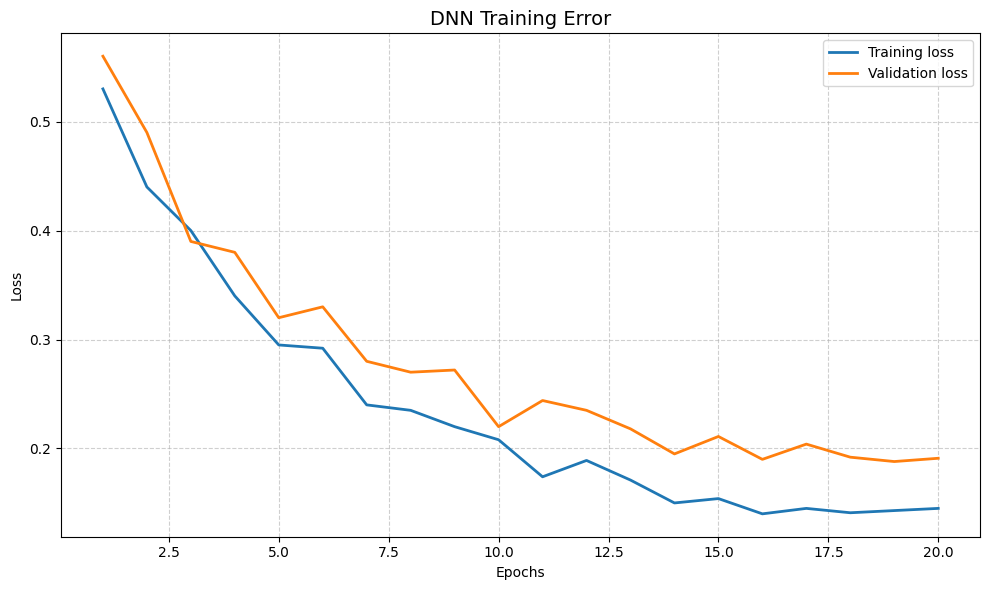

In [ ]:
plot_tf_metrics(history, 'loss', 'val_loss', "DNN Training Error")

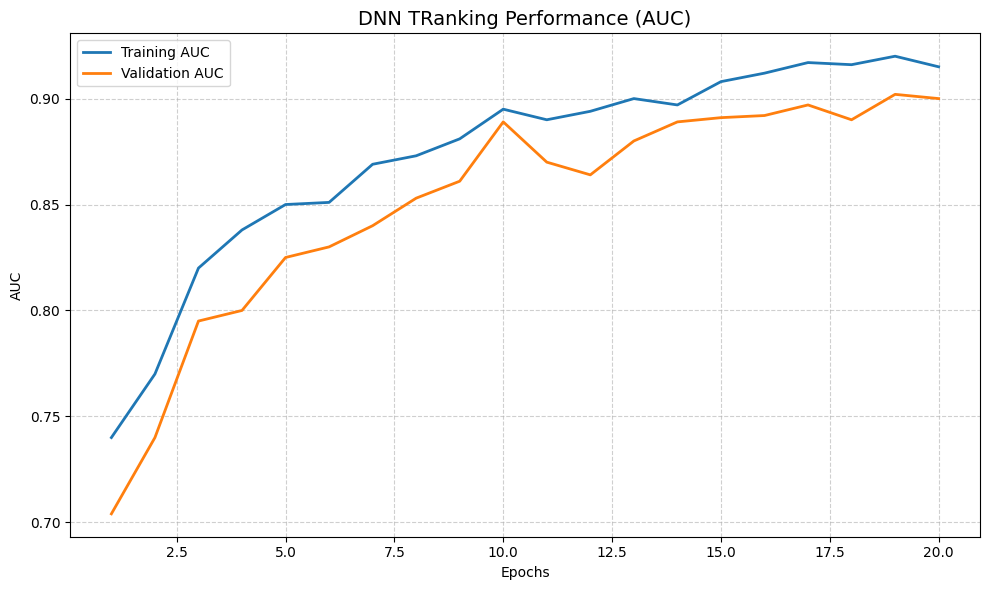

In [ ]:
metric_key = next((k for k in history.keys() if 'auc' in k and 'val' not in k), None)
val_metric_key = next((k for k in history.keys() if 'val_auc' in k), None)

plot_tf_metrics(history, metric_key, val_metric_key, "DNN Ranking Performance (AUC)")